In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
train_data_path = r"C:\Users\NILESH GOLATKAR\fraudTrain.csv"
test_data_path = r"C:\Users\NILESH GOLATKAR\fraudTest.csv"

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)


In [8]:
# Fill missing values
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

# Define features and target variable
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_df[features]
y = train_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize models
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

In [11]:
# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: '2019-01-01 00:00:18'

<Figure size 1200x800 with 0 Axes>

C:\Users\ompan\AppData\Local\Temp\ipykernel_21336\762649144.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='city', y='is_fraud', data=train_df.groupby('city').sum().reset_index())


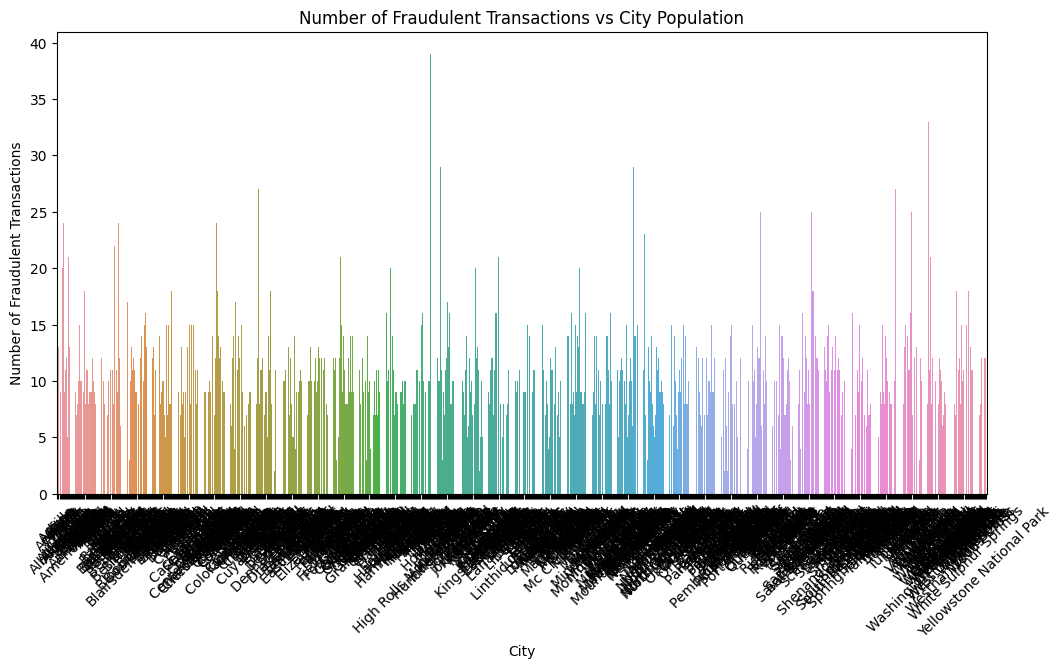

In [7]:
# Barplot to compare population size of each city with number of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='is_fraud', data=train_df.groupby('city').sum().reset_index())
plt.title('Number of Fraudulent Transactions vs City Population')
plt.xlabel('City')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [9]:
def plot_roc_pr_curves(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)

    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')

    plt.tight_layout()
    plt.show()


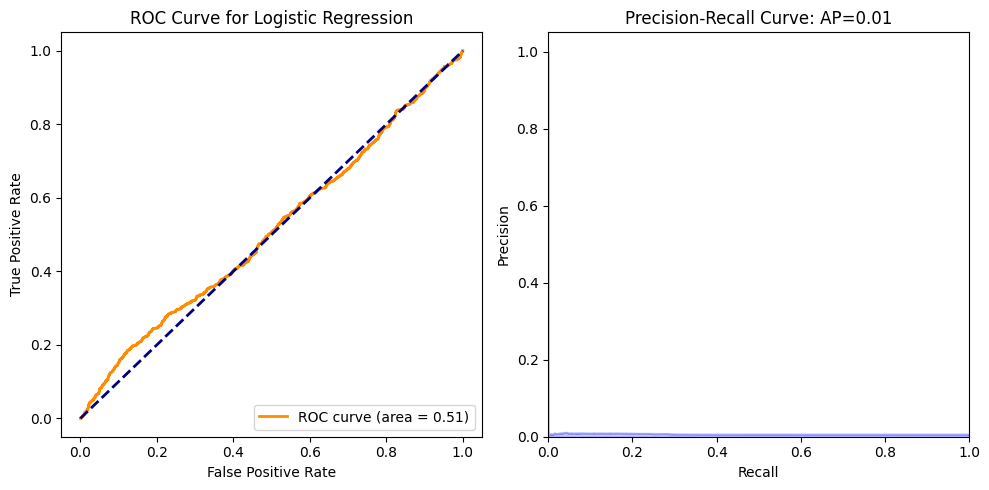

In [10]:

plot_roc_pr_curves(lr_model, X_test, y_test, 'Logistic Regression')


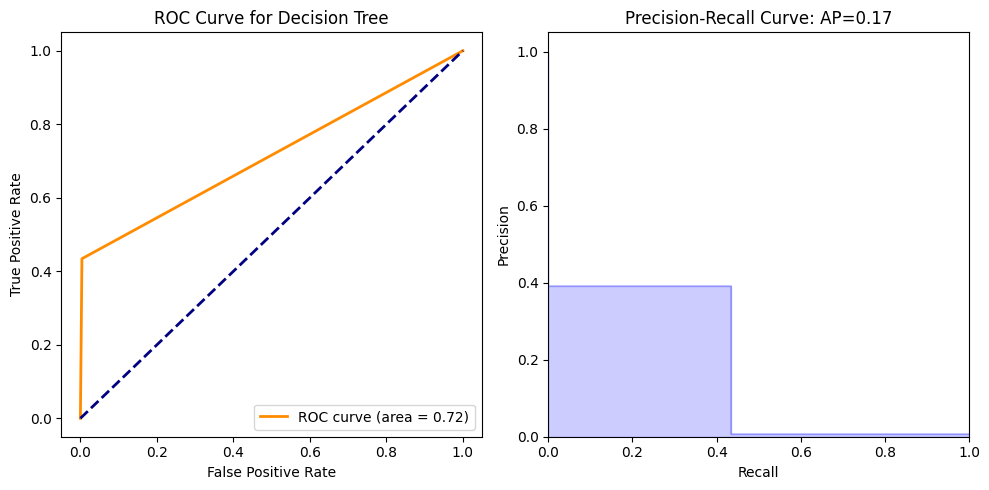

In [11]:

plot_roc_pr_curves(dt_model, X_test, y_test, 'Decision Tree')


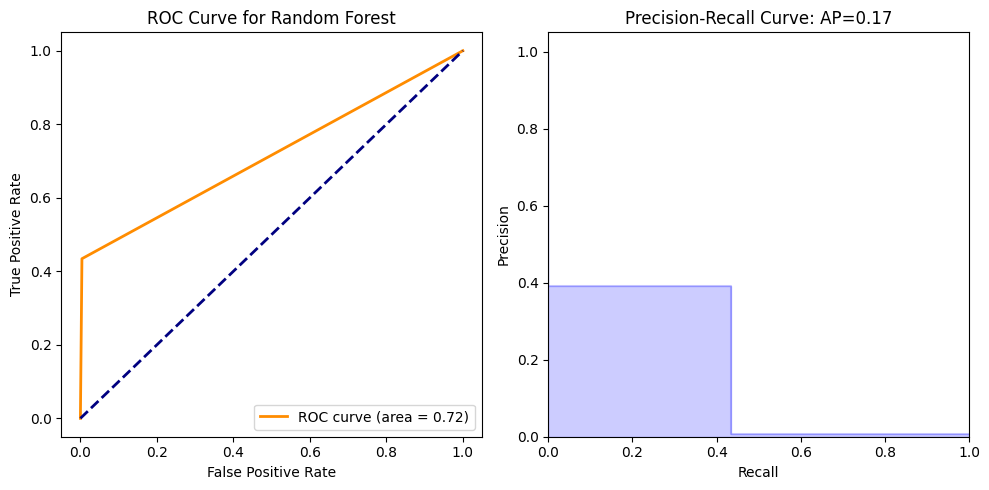

In [12]:

plot_roc_pr_curves(dt_model, X_test, y_test, 'Random Forest')
